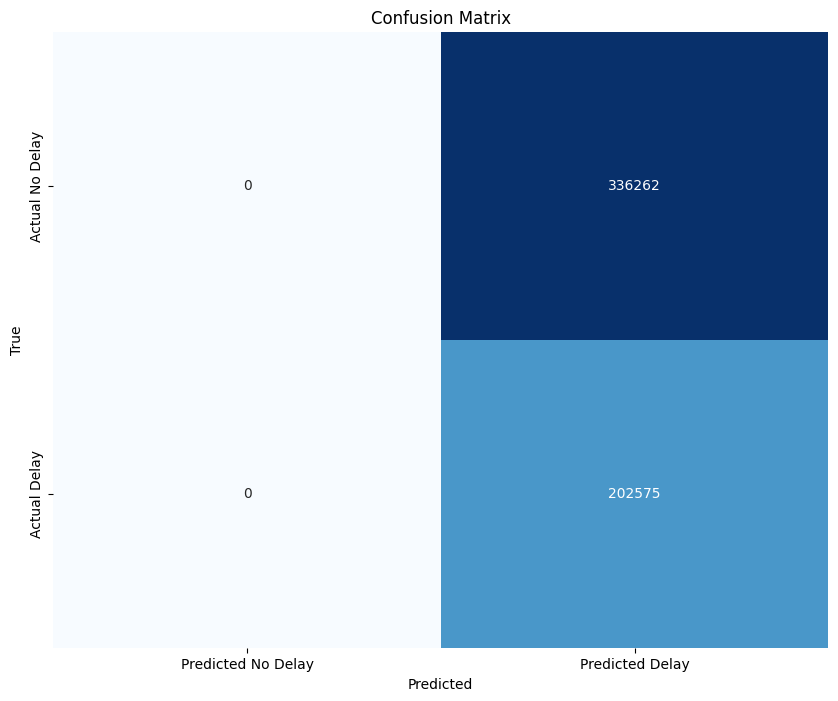

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Definir los valores de la matriz de confusión
tn = 0  # True Negative (No Delay Predicho Correctamente)
fp = 336262  # False Positive (Delay Predicho Incorrectamente)
tp = 202575    # True Positive (Delay Predicho Correctamente)
fn = 0  # False Negative (No Delay Predicho Incorrectamente)
# Crear la matriz de confusión
conf_matrix = np.array([[tn, fp], [fn, tp]])
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Delay', 'Predicted Delay'],
            yticklabels=['Actual No Delay', 'Actual Delay'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

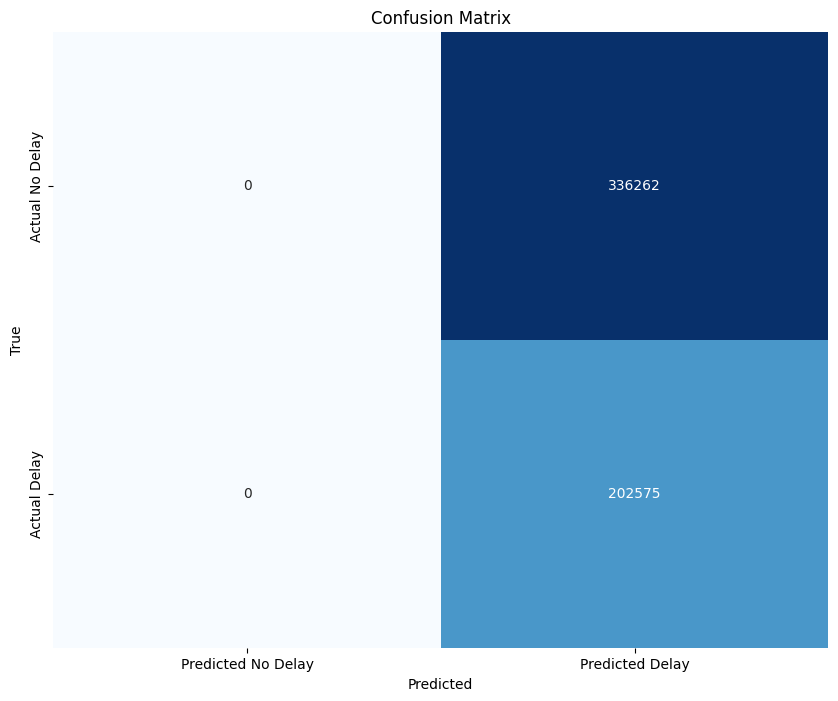

Métricas para la Clase 0 (No Delay):
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Métricas para la Clase 1 (Delay):
  Precision: 0.3759
  Recall: 1.0000
  F1 Score: 0.5465

Exactitud (Accuracy): 0.3759


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tn = 0  # True Negative (No Delay Predicho Correctamente)
fp = 336262  # False Positive (Delay Predicho Incorrectamente)
tp = 202575    # True Positive (Delay Predicho Correctamente)
fn = 0  # False Negative (No Delay Predicho Incorrectamente)
# Crear la matriz de confusión
conf_matrix = np.array([[tn, fp], [fn, tp]])
# Calcular métricas para la clase "No Delay" (Clase 0)
precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
# Calcular métricas para la clase "Delay" (Clase 1)
precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
             xticklabels=['Predicted No Delay', 'Predicted Delay'],
            yticklabels=['Actual No Delay', 'Actual Delay'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Mostrar las métricas para cada clase
print(f'Métricas para la Clase 0 (No Delay):')
print(f'  Precision: {precision_0:.4f}')
print(f'  Recall: {recall_0:.4f}')
print(f'  F1 Score: {f1_0:.4f}')
print(f'\nMétricas para la Clase 1 (Delay):')
print(f'  Precision: {precision_1:.4f}')
print(f'  Recall: {recall_1:.4f}')
print(f'  F1 Score: {f1_1:.4f}')
print(f'\nExactitud (Accuracy): {accuracy:.4f}')

In [4]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()
## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery
# Configurar el cliente de BigQuery
client = bigquery.Client(project='proyecto-4-datalab-433523')
# Definir la consulta para la vista
query = """
SELECT *
FROM `proyecto-4-datalab-433523.dataset_datalab.view_dummy_3`

"""
# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()
# Convertir los resultados a un DataFrame de pandas
df = results.to_dataframe()

In [5]:
df_majority = df[df.arr_delay_calculated == 1]
df_minority = df[df.arr_delay_calculated == 0]

In [6]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

In [7]:
import pandas as pd # Importa la libreria pandas con el alias 'pd'
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced.arr_delay_calculated.value_counts())


arr_delay_calculated
1    202575
0    202575
Name: count, dtype: Int64


In [8]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405150 entries, 1 to 463002
Data columns (total 65 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   dot_code                            405150 non-null  Int64  
 1   fl_date                             405150 non-null  dbdate 
 2   airline_code                        405150 non-null  object 
 3   fl_number                           405150 non-null  Int64  
 4   origin                              405150 non-null  object 
 5   origin_city                         405150 non-null  object 
 6   dest                                405150 non-null  object 
 7   dest_city                           405150 non-null  object 
 8   crs_dep_time                        405150 non-null  Int64  
 9   dep_time                            405150 non-null  float64
 10  dep_delay                           405150 non-null  float64
 11  taxi_out                       

In [9]:
# Seleccionar las columnas de tipo objeto
columnas_objeto = df_balanced.select_dtypes(include=['object']).columns
# Convertir las columnas de tipo objeto en dummies
df_dummies = pd.get_dummies(df_balanced, columns=columnas_objeto)
# Verifica las primeras filas del DataFrame con dummies
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 405150 entries, 1 to 463002
Columns: 4228 entries, dot_code to clasificacion_no delay
dtypes: Int64(17), bool(4172), dbdate(1), float64(38)
memory usage: 1.8 GB
None


In [11]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()
## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery
# Configurar el cliente de BigQuery
client = bigquery.Client(project='proyecto-4-datalab-433523')
# Definir la consulta para la vista
# Consulta SQL
query = """
SELECT
    arr_delay_calculated,
    dep_delay,
    taxi_out,
    air_time_winsorized,
    delay_due_carrier_winsorized,
    delay_due_weather_winsorized,
    delay_due_nas_winsorized,
    delay_due_security_winsorized,
    delay_due_late_aircraft_winsorized,
FROM
    `proyecto-4-datalab-433523.dataset_datalab.view_dummy_3`
"""
# Extraer datos usando pandas
# Use the BigQuery client to run the query and convert the result to a DataFrame
df = client.query(query).to_dataframe()
# Check for missing values
print(df.isnull().sum())
# Handle missing values (choose one of the methods below)
# 1. Drop rows with missing values
df = df.dropna()
# 2. Impute missing values with the mean
df = df.fillna(df.mean())
# Import train_test_split
from sklearn.model_selection import train_test_split # Import the necessary function
# Preparar datos para el modelo
X = df.drop('arr_delay_calculated', axis=1)  # características
y = df['arr_delay_calculated']  # variable objetivo
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo de regresión logística
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression # Import the necessary class
model = LogisticRegression(max_iter=1000)  # Aumentar max_iter si es necesario
model.fit(X_train, y_train)
# Evaluar el modelo
# Import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report # Import the necessary functions
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

arr_delay_calculated                  0
dep_delay                             0
taxi_out                              0
air_time_winsorized                   0
delay_due_carrier_winsorized          0
delay_due_weather_winsorized          0
delay_due_nas_winsorized              0
delay_due_security_winsorized         0
delay_due_late_aircraft_winsorized    0
dtype: int64
[[64766  2319]
 [   25 40658]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     67085
         1.0       0.95      1.00      0.97     40683

    accuracy                           0.98    107768
   macro avg       0.97      0.98      0.98    107768
weighted avg       0.98      0.98      0.98    107768



Accuracy: 0.98
Confusion Matrix:
[[64766  2319]
 [   25 40658]]


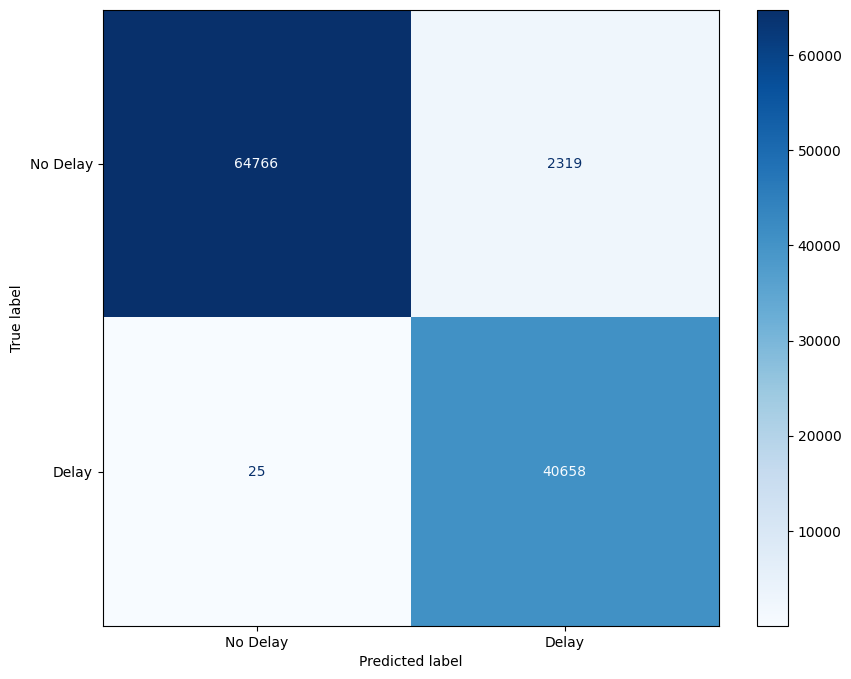

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     67085
         1.0       0.95      1.00      0.97     40683

    accuracy                           0.98    107768
   macro avg       0.97      0.98      0.98    107768
weighted avg       0.98      0.98      0.98    107768



In [12]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Delay', 'Delay'])
fig, ax = plt.subplots(figsize=(10, 8))  # Tamaño del gráfico
conf_matrix.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')  # 'd' para formato decimal
# Reporte de clasificación
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

                              Feature  Coefficient
4        delay_due_weather_winsorized     7.809073
5            delay_due_nas_winsorized     5.791629
7  delay_due_late_aircraft_winsorized     3.456279
3        delay_due_carrier_winsorized     1.178148
1                            taxi_out     0.084363
0                           dep_delay     0.024770
2                 air_time_winsorized     0.005577
6       delay_due_security_winsorized     0.000000


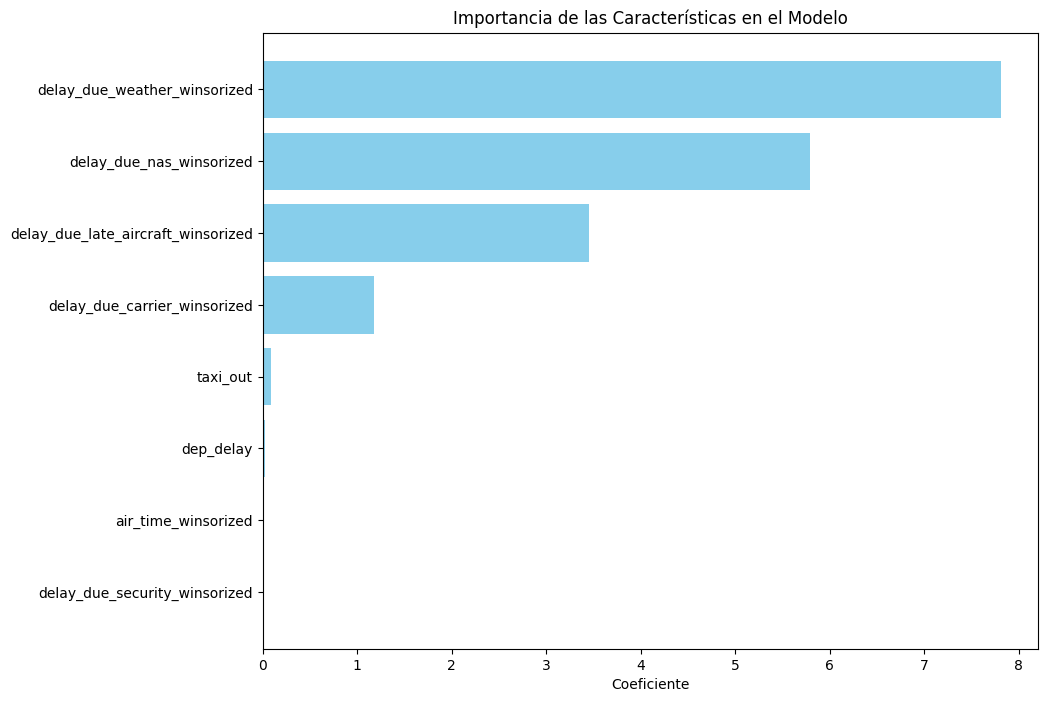

In [13]:
# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]
# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# Mostrar los coeficientes
print(coef_df)
# Graficar los coeficientes
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características en el Modelo')
plt.gca().invert_yaxis()
plt.show()